In [674]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [675]:
#StudentID: A unique identifier for each student.
#Name: The name of the student.
#Gender: The gender of the student (Male/Female).
#AttendanceRate: The percentage of classes attended by the student.
#StudyHoursPerWeek: The number of hours the student spends studying each week.
#PreviousGrade: The grade the student achieved in the previous semester (out of 100).
#ExtracurricularActivities: The number of extracurricular activities the student is involved in.
#ParentalSupport: A qualitative assessment of the level of support provided by the student's parents (High/Medium/Low).
#FinalGrade: The final grade of the student (out of 100), which serves as the target variable for prediction.

# **Data Inspection and Initial Exploration**

In [677]:
df=pd.read_csv('stu.csv')



In [678]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [679]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [680]:
df.shape
print("number of rows:",df.shape[0])
print("number of columns:",df.shape[1])

number of rows: 6607
number of columns: 20


In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [682]:
describe_dataframe=df.describe(include='all')
print(describe_dataframe)


        Hours_Studied   Attendance Parental_Involvement Access_to_Resources  \
count     6607.000000  6607.000000                 6607                6607   
unique            NaN          NaN                    3                   3   
top               NaN          NaN               Medium              Medium   
freq              NaN          NaN                 3362                3319   
mean        19.975329    79.977448                  NaN                 NaN   
std          5.990594    11.547475                  NaN                 NaN   
min          1.000000    60.000000                  NaN                 NaN   
25%         16.000000    70.000000                  NaN                 NaN   
50%         20.000000    80.000000                  NaN                 NaN   
75%         24.000000    90.000000                  NaN                 NaN   
max         44.000000   100.000000                  NaN                 NaN   

       Extracurricular_Activities  Sleep_Hours  Pre

# **Handling Missing Values and Dupplicated recored**

In [684]:
(df.isnull().sum()/df.shape[0])*100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

In [685]:
print("median of Parental_Education_Level",describe_dataframe['Parental_Education_Level']['50%'])
print("mean of Parental_Education_Level",describe_dataframe['Parental_Education_Level']['mean'])
print("-----------------------------------------------------------------------")
print("median of Distance_from_Home",describe_dataframe['Distance_from_Home']['50%'])
print("mean of Distance_from_Home",describe_dataframe['Distance_from_Home']['mean'])

median of Parental_Education_Level nan
mean of Parental_Education_Level nan
-----------------------------------------------------------------------
median of Distance_from_Home nan
mean of Distance_from_Home nan


In [686]:
df.drop('Distance_from_Home',axis=1,inplace=True)
df.drop('Parental_Education_Level',axis=1,inplace=True)

In [687]:
df.duplicated().sum()

0

# **Outlier Detection and Treatment**

In [689]:
numericalcol=df.select_dtypes(include=np.number).columns
categoricalcol=df.select_dtypes(exclude=np.number).columns

In [690]:
print("numerical columns:",numericalcol)
print("categorical columns:",categoricalcol)

numerical columns: Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
categorical columns: Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Gender'],
      dtype='object')


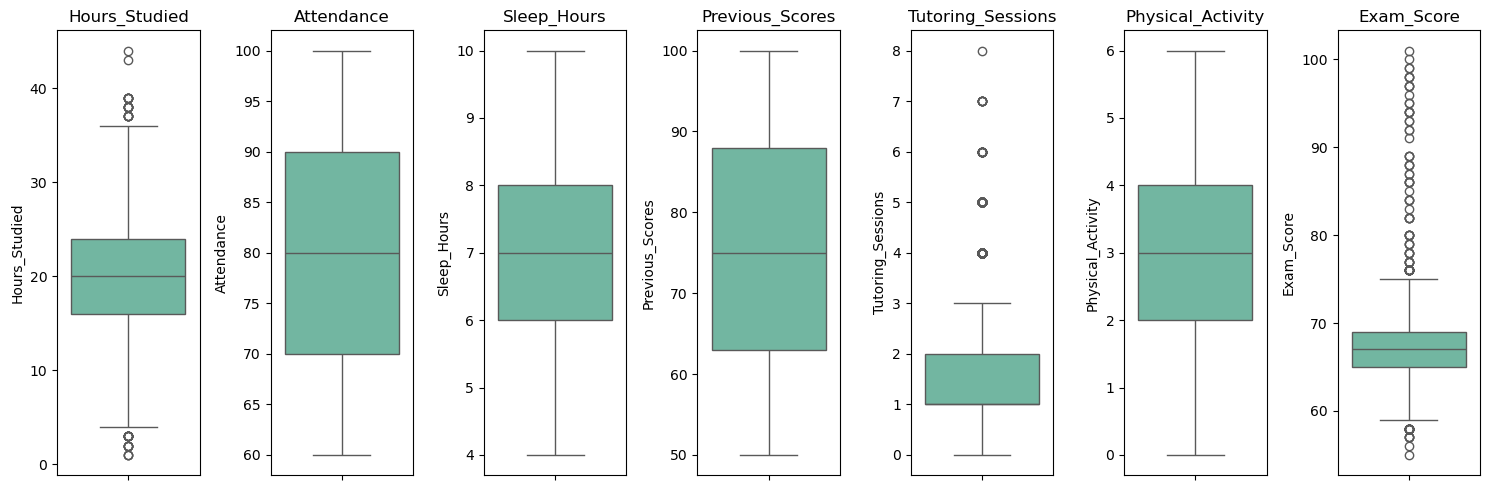

<Figure size 640x480 with 0 Axes>

In [691]:
fig, axes = plt.subplots(1, len(numericalcol), figsize=(15, 5))
palette = sns.color_palette("Set2")
for i, col in enumerate(numericalcol):
    sns.boxplot(y=df[col], ax=axes[i],palette=palette)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()
plt.savefig('boxplot.png')

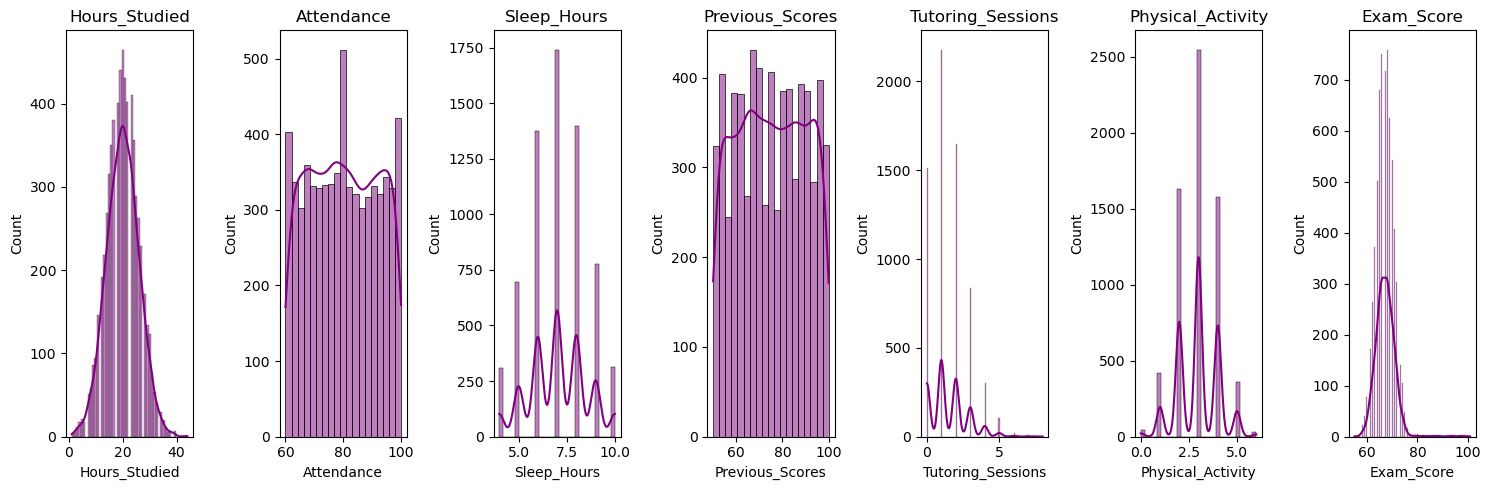

<Figure size 640x480 with 0 Axes>

In [692]:
fig, axes = plt.subplots(1, len(numericalcol), figsize=(15, 5))
for i, col in enumerate(numericalcol):
    sns.histplot(df[col], ax=axes[i],kde=True,color="purple")  # Make the x-axis the variable, y-axis the count
    axes[i].set_title(col)

plt.tight_layout()
plt.show()
plt.savefig('histogram.png')


In [693]:
Q1 = df['Tutoring_Sessions'].quantile(0.25)
Q3 = df['Tutoring_Sessions'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Tutoring_Sessions'] < lower_bound) | (df['Tutoring_Sessions'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]/df.shape[0]
print("Number of outliers in Tutoring_Sessions:",round(num_outliers,3))
print("*********************************************************")
Q1 = df['Hours_Studied'].quantile(0.25)
Q3 = df['Hours_Studied'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Hours_Studied'] < lower_bound) | (df['Hours_Studied'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]/df.shape[0]
print("Number of outliers in Hours_Studied:",round(num_outliers,3))
print("*********************************************************")
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Exam_Score'] < lower_bound) | (df['Exam_Score'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]/df.shape[0]
print("Number of outliers in Exam_Score:",round(num_outliers,3))

Number of outliers in Tutoring_Sessions: 0.065
*********************************************************
Number of outliers in Hours_Studied: 0.007
*********************************************************
Number of outliers in Exam_Score: 0.016


In [694]:
# Note: The number of outliers is small, and they represent realistic values.
# We will keep them in the dataset to preserve natural variability.

# **Checking Data Consistency and Visualizing Categorical Distributions**

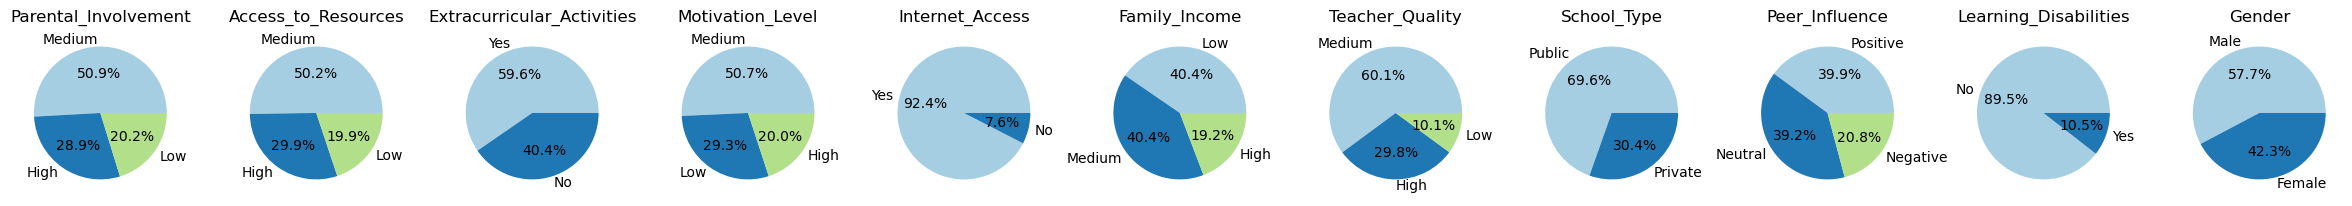

<Figure size 640x480 with 0 Axes>

In [696]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'df' and categorical columns 'categoricalcol'

# Adjust figure size as needed
fig, axes = plt.subplots(1, len(categoricalcol), figsize=(30, 30))

# Set a sequential color palette (adjust as needed)
palette = sns.color_palette("Paired")  # You can explore other palettes in Seaborn
# Plot each pie chart with appropriate labels and colors
for ax, col in zip(axes, categoricalcol):
    # Calculate value counts
    counts = df[col].value_counts()

    # Plot the pie chart with appropriate labels
    ax.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=palette)
    ax.set_title(col)

# Adjust layout to minimize gaps
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
plt.savefig('piechart.png')

In [697]:
for col in categoricalcol:
    print(df[col].value_counts())

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
School_Type
Public     4598
Private    2009
Name: count, dtype: int64
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64
Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64
Gender
Male      3814
Female    2793
Name: count, dtype: int64


# **Feature Engineering**

In [699]:
df['Hours_Studied'].describe()

count    6607.000000
mean       19.975329
std         5.990594
min         1.000000
25%        16.000000
50%        20.000000
75%        24.000000
max        44.000000
Name: Hours_Studied, dtype: float64

In [700]:
df['Study_Efficiency'] = df['Hours_Studied'] * df['Attendance']
df['Sleep_Performance_Ratio'] = df['Sleep_Hours'] / df['Exam_Score']
bins = [0, 8, 12, 26, 45]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Study_Intensity'] = pd.cut(df['Hours_Studied'], bins=bins, labels=labels)


# **Visualizing Relationships Between Variables**

In [702]:
numericalcol=df.select_dtypes(include=np.number).columns


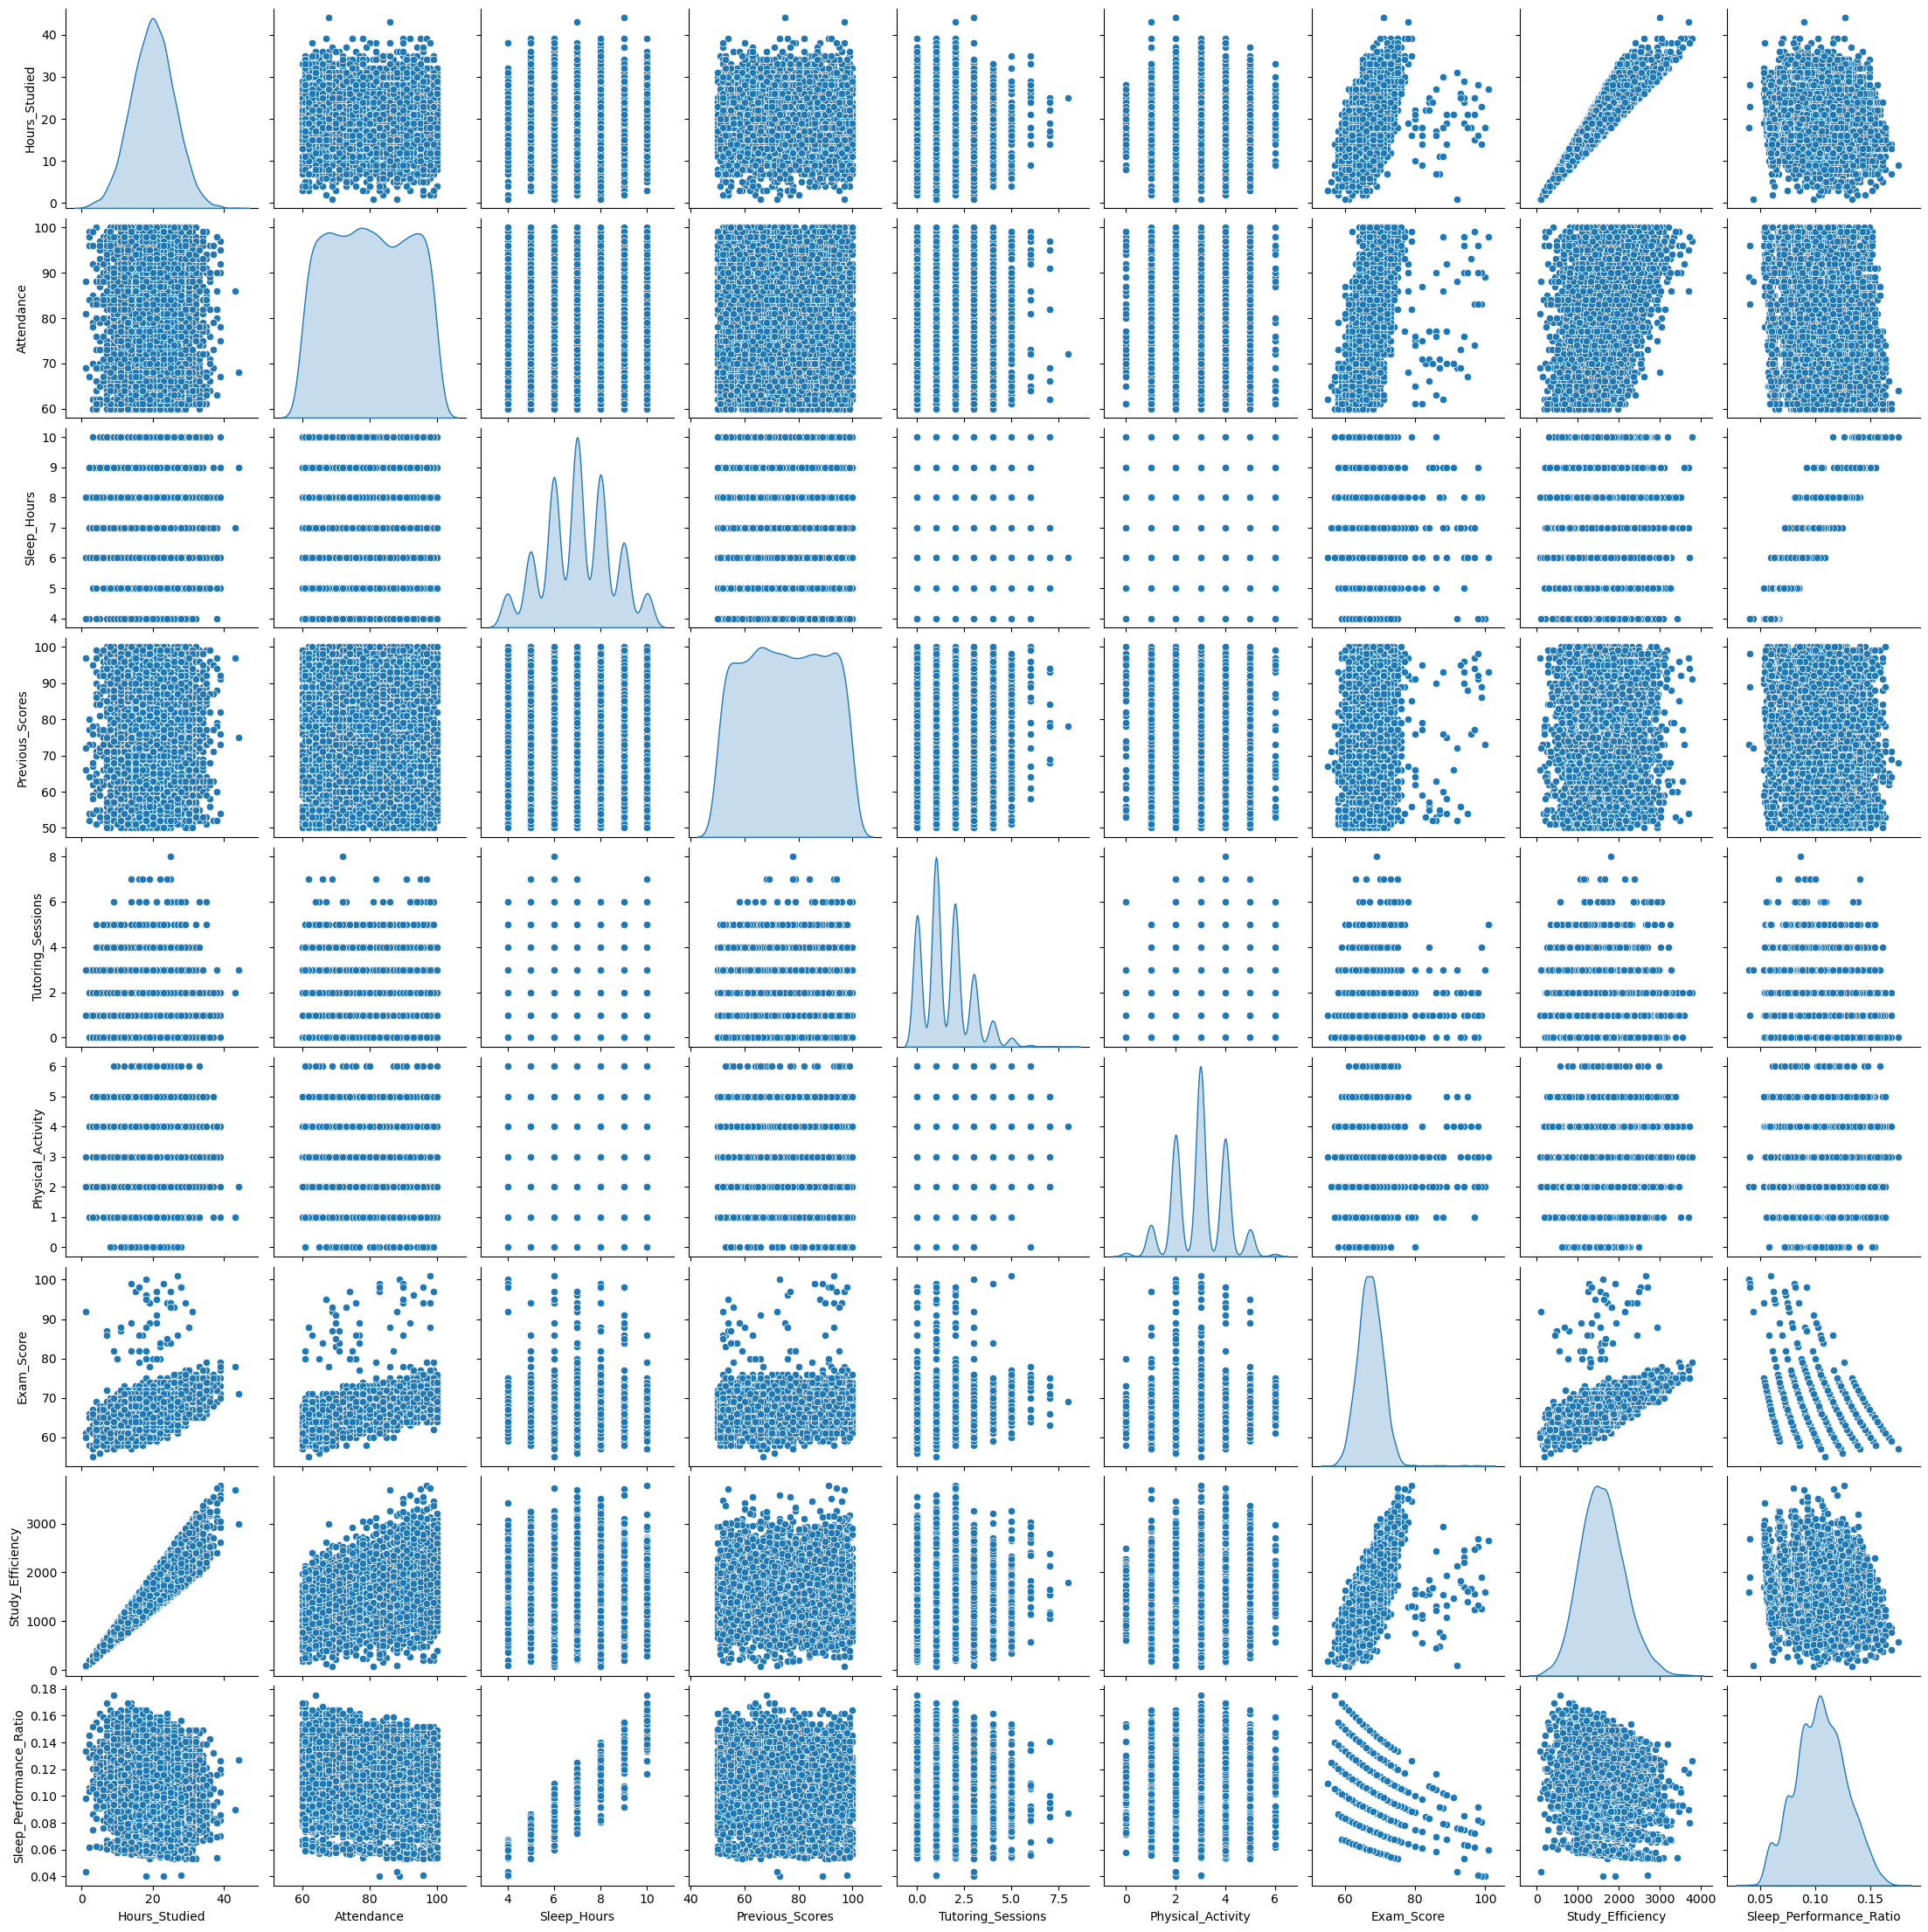

<Figure size 640x480 with 0 Axes>

In [703]:
import seaborn as sns
import matplotlib.pyplot as plt

# Include 'Exam_Score' in the numerical columns list
numericalcol_with_target = numericalcol

# Generate the pair plot
sns.pairplot(df[numericalcol_with_target],diag_kind='kde', palette='coolwarm')

plt.show()
plt.savefig('pairplot.png')

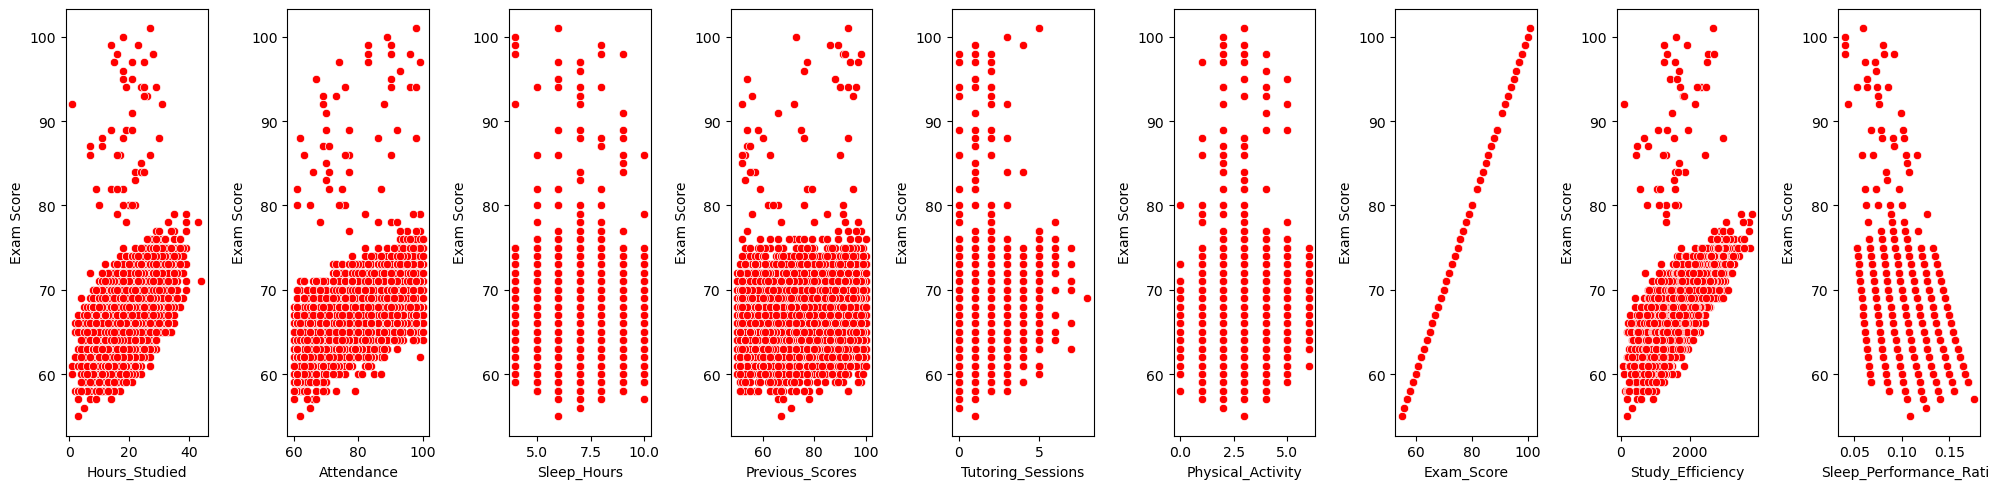

<Figure size 640x480 with 0 Axes>

In [704]:
fig, axes = plt.subplots(nrows=1, ncols=len(numericalcol), figsize=(20, 5))

for ax, col in zip(axes, numericalcol):
    sns.scatterplot(x=df[col], y=df['Exam_Score'], ax=ax,color="red")
    ax.set_xlabel(col)
    ax.set_ylabel('Exam Score')
plt.tight_layout()
plt.show()
plt.savefig('scatter.png')

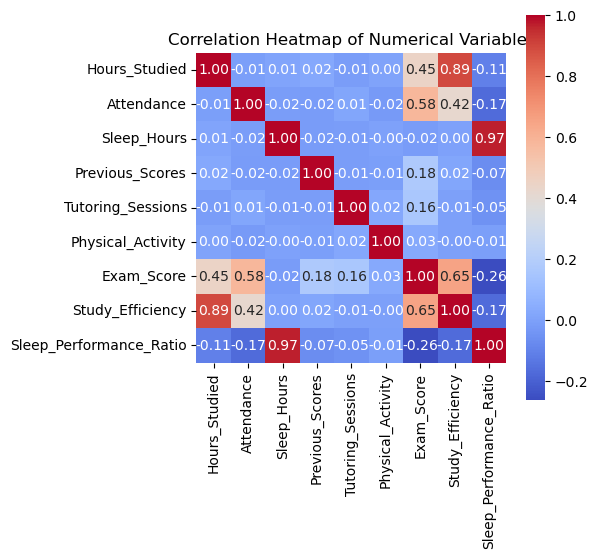

<Figure size 640x480 with 0 Axes>

In [705]:
correlation_matrix = df[numericalcol].corr()

# Create a heatmap
plt.figure(figsize=(5, 5))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()
plt.savefig('heatmap.png')

In [706]:
categoricalcol=df.select_dtypes(exclude=np.number).columns

In [707]:
print(df.columns)


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Gender', 'Exam_Score', 'Study_Efficiency', 'Sleep_Performance_Ratio',
       'Study_Intensity'],
      dtype='object')


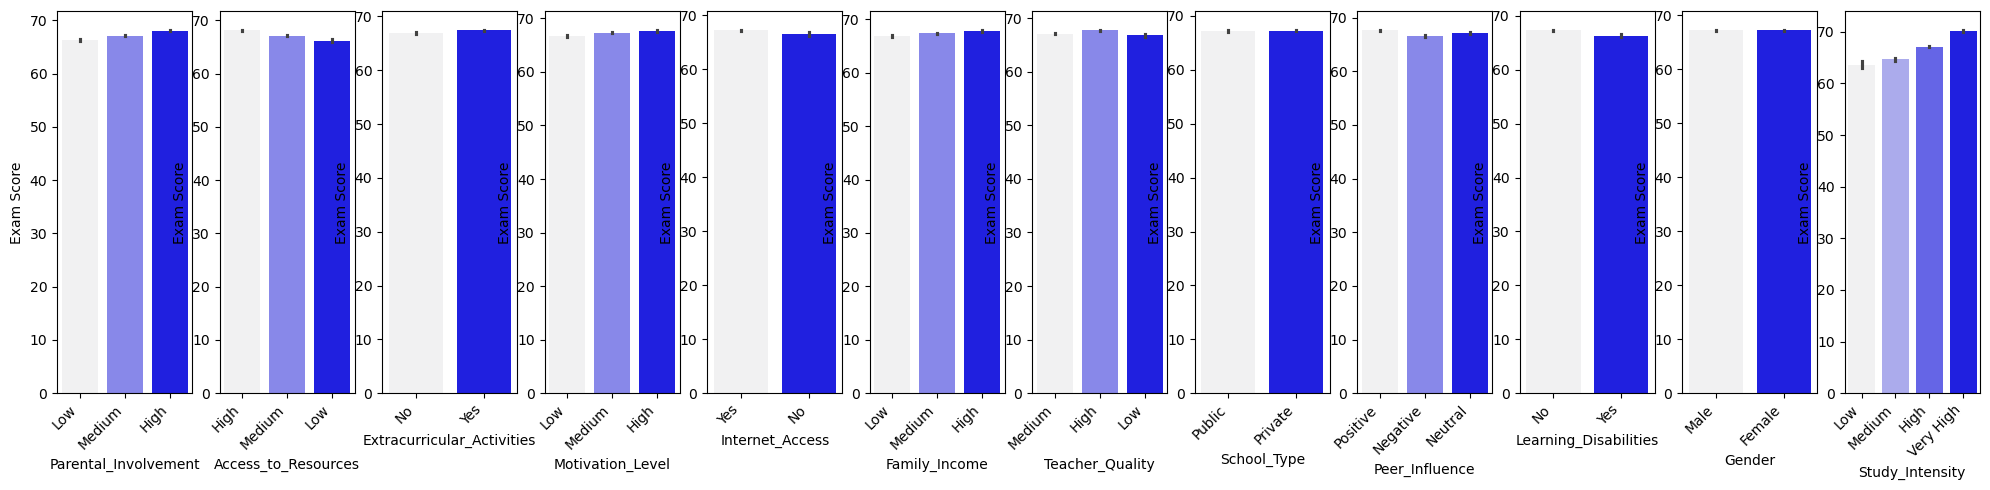

<Figure size 640x480 with 0 Axes>

In [708]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(nrows=1, ncols=len(categoricalcol), figsize=(20, 5))  # Adjust figsize based on the number of columns

for ax, col in zip(axes, categoricalcol):
    sns.barplot(x=col, y='Exam_Score', data=df, ax=ax, palette='light:b')
    ax.set_xlabel(col)
    ax.set_ylabel('Exam Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()  # Automatically adjusts subplots to fit in the figure
plt.subplots_adjust(wspace=0.2)  # Adjust the width between subplots if needed
plt.show()
plt.savefig('barplot.png')


# **Scaling Numerical Features and Encoding Categorical Features**

In [710]:
copydf=df.copy()

In [711]:
for i in categoricalcol:
    copydf=pd.concat([copydf,pd.get_dummies(copydf[i],drop_first=True,prefix=i)],axis=1)
    copydf.drop(i,axis=1,inplace=True)

In [712]:
for i in categoricalcol:
    df=pd.concat([df,pd.get_dummies(df[i],drop_first=True,prefix=i)],axis=1)
    df.drop(i,axis=1,inplace=True)

In [713]:
numericalcol=copydf.select_dtypes(include=np.number).columns
print(numericalcol)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Study_Efficiency', 'Sleep_Performance_Ratio'],
      dtype='object')


In [714]:
numericalwithouttarget=numericalcol.drop('Exam_Score')

In [715]:
for col in numericalwithouttarget:
    scaler=StandardScaler()
    copydf[col]=scaler.fit_transform(copydf[[col]])

# **Implementing Machine Learning Algorithms**

In [717]:
X=copydf.drop('Exam_Score',axis=1)
y=copydf['Exam_Score']

In [718]:
##Train Test split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [719]:
results=[]

In [720]:
linerreg=LinearRegression()
linerreg.fit(x_train,y_train)
y_test_pred=linerreg.predict(x_test)
y_train_pred=linerreg.predict(x_train)
linerr2train=r2_score(y_train,y_train_pred)
linerr2test=r2_score(y_test,y_test_pred)
linemsetrain=mean_squared_error(y_train,y_train_pred)
linemsetest=mean_squared_error(y_test,y_test_pred)
print("r2 train for linear reg",linerr2train)
print("r2 test for linear reg",linerr2test)
print("mean_squared_error train for linear reg",linemsetrain)
print("mean_squared_error test for linear reg",linemsetest)


r2 train for linear reg 0.9295856272650286
r2 test for linear reg 0.9473545450128485
mean_squared_error train for linear reg 1.083040855982973
mean_squared_error test for linear reg 0.7441473216203809


In [721]:
results.append({
    'Model': 'LinearRegression',
    'R² Train': linerr2train,
    'R² Test': linerr2test,
    'MSE Train': linemsetrain,
    'MSE Test': linemsetest,
    'Best Params':"--"
})

In [722]:
knnparam={'n_neighbors': [i for i in range(25,70)]}

In [723]:
knngrid_=GridSearchCV(KNeighborsRegressor(),knnparam,cv=5,verbose=3,n_jobs=-1)
knngrid_.fit(x_train,y_train)
y_test_pred=knngrid_.predict(x_test)
y_train_pred=knngrid_.predict(x_train)
knnbestparm=knngrid_.best_params_
print(knnbestparm)
knnscore=knngrid_.best_score_
print("knnscore",knnscore)
knnr2train=r2_score(y_train,y_train_pred)
knnr2test=r2_score(y_test,y_test_pred)
knnmsetrain=mean_squared_error(y_train,y_train_pred)
knnmsetest=mean_squared_error(y_test,y_test_pred)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'n_neighbors': 25}
knnscore 0.5992356080099596


In [724]:
results.append({
    'Model': 'KNeighborsRegressor',
    'R² Train': knnr2train,
    'R² Test': knnr2test,
    'MSE Train': knnmsetrain,
    'MSE Test': knnmsetest,
    'Best Params':knnbestparm
})

In [725]:
print("r2 train for knn",knnr2train)
print("r2 test for knn",knnr2test)
print("mean_squared_error train for knn",knnmsetrain)
print("mean_squared_error test for knn",knnmsetest)

r2 train for knn 0.6255480965376863
r2 test for knn 0.6608158361116014
mean_squared_error train for knn 5.759430842005676
mean_squared_error test for knn 4.794392738275341


In [726]:
dtparam={'criterion': ['squared_error', 'absolute_error'],
            'splitter': ['best', 'random'],
            'max_depth': [i for i in range(1, 15)],
            'min_samples_split': [i for i in range(2, 15)],
            'min_samples_leaf': [i for i in range(1, 15)],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_leaf_nodes': [i for i in range(2, 15)]}

In [727]:
nvgparam={'var_smoothing': [10**i for i in range(-9, 0)]}

In [728]:
nvgrid_=GridSearchCV(GaussianNB(),nvgparam,cv=5,verbose=3,n_jobs=-1)
nvgrid_.fit(x_train,y_train)
nvbestparm=nvgrid_.best_params_
y_test_prednv=nvgrid_.predict(x_test)
y_train_prednv=nvgrid_.predict(x_train)
ytrainr2nv=r2_score(y_train,y_train_prednv)
ytestr2nv=r2_score(y_test,y_test_prednv)
ytrainmsenv=mean_squared_error(y_train,y_train_prednv)
ytestmsenv=mean_squared_error(y_test,y_test_prednv)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [729]:
results.append({
    'Model': 'GaussianNB',
    'R² Train': ytrainr2nv,
    'R² Test': ytestr2nv,
    'MSE Train': knnmsetrain,
    'MSE Test': ytestmsenv,
    'Best Params':nvbestparm
})

In [730]:
print("R2 train for naive bayes",ytrainr2nv)
print("R2 test for naive bayes",ytestr2nv)
print("mean_squared_error train for naive bayes",ytrainmsenv)
print("mean_squared_error test for naive bayes",ytestmsenv)

R2 train for naive bayes -0.14486215209352538
R2 test for naive bayes -0.19797293030500773
mean_squared_error train for naive bayes 17.609082308420057
mean_squared_error test for naive bayes 16.93343419062027


In [731]:
svmparam={'kernel': ['linear','rbf'],
            'C': [0.001, 0.01, 0.1, 1],
            'gamma': ['scale', 'auto'],
            'degree': [2, 3, 4]}

In [732]:
svmgrid=GridSearchCV(SVR(),svmparam,cv=5,verbose=3,n_jobs=-1)
svmgrid.fit(x_train,y_train)
svmbestparm=svmgrid.best_params_
y_test_predsvm=svmgrid.predict(x_test)
y_train_predsvm=svmgrid.predict(x_train)
r2trainsvm=r2_score(y_train,y_train_predsvm)
r2testsvm=r2_score(y_test,y_test_predsvm)
msesetsvm=mean_squared_error(y_train,y_train_predsvm)
msesetsvm=mean_squared_error(y_test,y_test_predsvm)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [733]:
results.append({
    'Model': 'SVR',
    'R² Train': r2trainsvm,
    'R² Test': r2testsvm,
    'MSE Train': knnmsetrain,
    'MSE Test': msesetsvm,
    'Best Params':msesetsvm
})

In [734]:
print("r2trainsvm",r2trainsvm)
print("r2testsvm",r2testsvm)
print("msesetsvm",msesetsvm)
print("msesetsvm",msesetsvm)

r2trainsvm 0.8844072802899852
r2testsvm 0.9202354640324157
msesetsvm 1.1274774966814678
msesetsvm 1.1274774966814678


In [735]:
randomfparam={'n_estimators': [50, 100],
            'max_depth': [i for i in range(5,8)],
            'min_samples_leaf': [i for i in range(3, 9)],
            'max_leaf_nodes': [i for i in range(5, 10)],
            'bootstrap': [True, False]
            }

In [736]:
from sklearn.metrics import r2_score, mean_squared_error

In [737]:
rdgrid_=GridSearchCV(RandomForestRegressor(),randomfparam,cv=5,verbose=3,n_jobs=-1)
rdgrid_.fit(x_train,y_train)
y_test_predrdrf=rdgrid_.predict(x_test)
y_train_predrdrf=rdgrid_.predict(x_train)
r2trainrf=r2_score(y_train,y_train_predrdrf)
r2testrf=r2_score(y_test,y_test_predrdrf)




Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [738]:
msetrainrf = mean_squared_error(y_train, y_train_predrdrf)
msetestrf = mean_squared_error(y_test, y_test_predrdrf)

In [739]:
print("r2trainrandomforest",r2trainrf)
print("r2testrandomforest",r2testrf)
print("msesetrainrandomforest",msetrainrf)
print("msesetestrandomforest",msetestrf)

r2trainrandomforest 0.5465540610840083
r2testrandomforest 0.5637166508455551
msesetrainrandomforest 6.974435172120377
msesetestrandomforest 6.166896759085574


In [740]:
results.append({
    'Model': 'RandomForestRegressor',
    'R² Train': r2trainrf,
    'R² Test': r2testrf,
    'MSE Train': msetrainrf,
    'MSE Test': msetestrf,
    'Best Params':rdgrid_.best_params_
})

In [741]:
xgbparam={'n_estimators': [30, 50, 100],
            'learning_rate': [ 0.4, 0.5, 0.6],
            'max_depth': [i for i in range(2, 10)],
            'gamma': [0.001, 0.01, 0.1],
            'subsample': [0.5, 0.8]}

In [742]:
xgbgrid=GridSearchCV(XGBRegressor(),xgbparam,cv=5,verbose=3,n_jobs=-1)
xgbgrid.fit(x_train,y_train)
y_test_predxgb=xgbgrid.predict(x_test)
y_train_predxgb=xgbgrid.predict(x_train)
r2trainxgb=r2_score(y_train,y_train_predxgb)
r2testxgb=r2_score(y_test,y_test_predxgb)
msesetxgb=mean_squared_error(y_train,y_train_predxgb)
msesetxgb=mean_squared_error(y_test,y_test_predxgb)
print(r2trainxgb)
print(r2testxgb)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
0.9569123643856005
0.9402013567679921


In [743]:
results.append({
    'Model': 'XGBRegressor',
    'R² Train': r2trainxgb,
    'R² Test': r2testxgb,
    'MSE Train': msesetxgb,
    'MSE Test': msesetxgb,
    'Best Params':xgbgrid.best_params_
})

In [744]:
adaparam = {
    'n_estimators': [i for i in range(10, 60, 10)],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}


In [745]:
adagrid=GridSearchCV(AdaBoostRegressor(),adaparam,cv=5,verbose=3,n_jobs=-1)
adagrid.fit(x_train,y_train)
y_test_predada=adagrid.predict(x_test)
y_train_predada=adagrid.predict(x_train)
r2trainada=r2_score(y_train,y_train_predada)
r2testada=r2_score(y_test,y_test_predada)
msetrainada=mean_squared_error(y_train,y_train_predada)
msetestada=mean_squared_error(y_test,y_test_predada)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [746]:
print(f"R² train ada: {r2trainada}")
print(f"R² test ada: {r2testada}")
print(f"MSE (train) ada: {msetrainada}")
print(f"MSE (test) ada: {msetestada}")

R² train ada: 0.619882869712137
R² test ada: 0.5930001400098817
MSE (train) ada: 5.8465674857357035
MSE (test) ada: 5.752972517483874


In [747]:
gradientparam={'n_estimators': [i for i in range(30,60,10)],
            'learning_rate': [ 0.3, 0.6],
            'max_depth': [i for i in range(4,8,2)],
            'min_samples_leaf': [i for i in range(6, 15)],
            'subsample': [0.6, 0.7, 0.8]}

In [748]:
grdientgrid=GridSearchCV(GradientBoostingRegressor(),gradientparam,cv=5,verbose=3,n_jobs=-1)
grdientgrid.fit(x_train,y_train)
y_test_predgrad=grdientgrid.predict(x_test)
y_train_predgrad=grdientgrid.predict(x_train)
r2traingrad=r2_score(y_train,y_train_predgrad)
r2testgrad=r2_score(y_test,y_test_predgrad)
msesetgrad=mean_squared_error(y_train,y_train_predgrad)
msesetgrad=mean_squared_error(y_test,y_test_predgrad)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [749]:
results.append({
    'Model': 'GradientBoostingRegressor',
    'R² Train': r2traingrad,
    'R² Test': r2testgrad,
    'MSE Train': msesetgrad,
    'MSE Test': msesetgrad,
    'Best Params':grdientgrid.best_params_
})

In [750]:
print("r2traingrad",r2traingrad)
print("r2testgrad",r2testgrad)
print("msesetgrad",msesetgrad)
print("msesetgrad",msesetgrad)

r2traingrad 0.9466180181867682
r2testgrad 0.8916916086613895
msesetgrad 1.5309469610113455
msesetgrad 1.5309469610113455


In [751]:
results_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)

In [752]:
print(results_df)

                       Model  R² Train   R² Test  MSE Train   MSE Test  \
0           LinearRegression  0.929586  0.947355   1.083041   0.744147   
1        KNeighborsRegressor  0.625548  0.660816   5.759431   4.794393   
2                 GaussianNB -0.144862 -0.197973   5.759431  16.933434   
3                        SVR  0.884407  0.920235   5.759431   1.127477   
4      RandomForestRegressor  0.546554  0.563717   6.974435   6.166897   
5               XGBRegressor  0.956912  0.940201   0.845258   0.845258   
6  GradientBoostingRegressor  0.946618  0.891692   1.530947   1.530947   

                                                                                            Best Params  
0                                                                                                    --  
1                                                                                   {'n_neighbors': 25}  
2                                                                                {'var_sm

In [753]:
##best Performing Model:XGBoost Regressor (XGBRegressor)